**The original [tutorial template](https://www.tensorflow.org/tutorials/keras/classification) belongs to TensorFlow, personal elaborations are mainly located at section II onwards.**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
</table>

# I. Basic classification: Classify images of clothing

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. In essence, it is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.initializers import GlorotUniform

import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 10

print(tf.__version__)

2.2.0


## I.1 Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

## I.2 Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

Let us inspect the first image in the training set. Note each pixel value ranges between 0 and 255:

In [ ]:
train_images[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

## I.3 Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

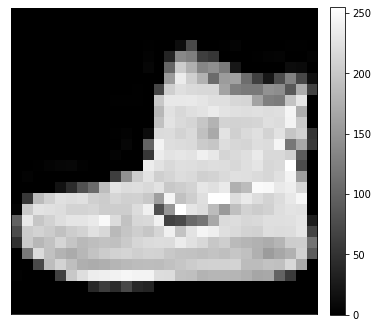

In [ ]:
plt.figure(figsize = (6,6))
im = plt.imshow(train_images[0], cmap='gray')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

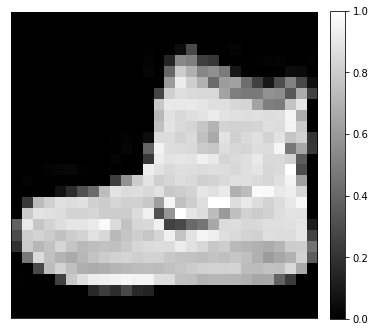

In [ ]:
plt.figure(figsize = (6,6))
im = plt.imshow(train_images[0], cmap='gray')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

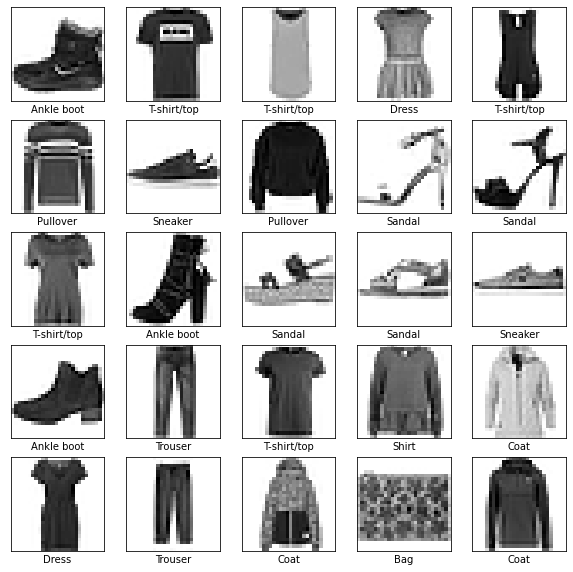

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## I.4 Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### I.4.1 Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [ ]:
nn_dense = 144

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(nn_dense, activation='relu', kernel_initializer=GlorotUniform(seed=RANDOM_SEED)),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=GlorotUniform(seed=RANDOM_SEED))
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 144)               113040    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1450      
Total params: 114,490
Trainable params: 114,490
Non-trainable params: 0
_________________________________________________________________


### I.4.2 Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## I.5 Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array. Verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data.

In [ ]:
n_epochs = 15

In [ ]:
history = model.fit(train_images,
                    train_labels,
                    epochs=n_epochs,
                    validation_data=(test_images, test_labels))       

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4909 - accuracy: 0.8254 - val_loss: 0.4635 - val_accuracy: 0.8331
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3714 - accuracy: 0.8652 - val_loss: 0.3920 - val_accuracy: 0.8611
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3343 - accuracy: 0.8779 - val_loss: 0.3695 - val_accuracy: 0.8700
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3097 - accuracy: 0.8851 - val_loss: 0.3609 - val_accuracy: 0.8671
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2922 - accuracy: 0.8913 - val_loss: 0.3386 - val_accuracy: 0.8772
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2784 - accuracy: 0.8980 - val_loss: 0.3528 - val_accuracy: 0.8752
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2652 - accuracy: 0.9008 - val_loss: 0.3454 - val_accuracy:

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.92 on the training data.

In [ ]:
def plot_history(history, figsize=(20,8), epochs=30,
                 default_xticks=False,
                 loss_yticks=None, acc_yticks=None):

    plt.figure(figsize=figsize)

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    if not default_xticks: plt.xticks(range(len(history.epoch)),range(1,len(history.epoch)+1))
    plt.xlabel("Epoch")
    plt.title("Loss history")
    if loss_yticks: plt.ylim(loss_yticks)

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    if not default_xticks: plt.xticks(range(len(history.epoch)),range(1,len(history.epoch)+1))
    plt.xlabel("Epoch")
    plt.title("Accuracy history")
    if acc_yticks: plt.ylim(acc_yticks)

    plt.show()

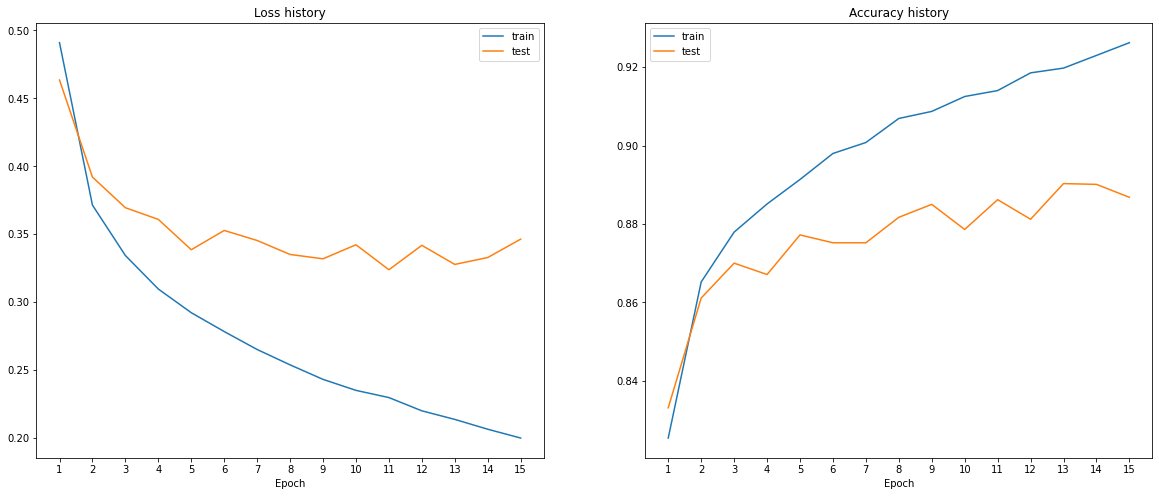

In [ ]:
plot_history(history, epochs=n_epochs, default_xticks=False)

The increase of validation loss past a certain epoch already anticipates the overfitting that is presented below with the testing accuracy.

## I.6 Evaluate testing accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3464 - accuracy: 0.8868

Test accuracy: 0.8867999911308289


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

## I.7 Make predictions

With the model trained, you can use it to make predictions about some images.

In [ ]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([1.0452073e-11, 8.9316738e-13, 8.3995380e-11, 4.9500144e-12,
       3.0799229e-13, 1.2741524e-05, 8.2199763e-13, 3.5695697e-03,
       2.0273818e-09, 9.9641764e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

9

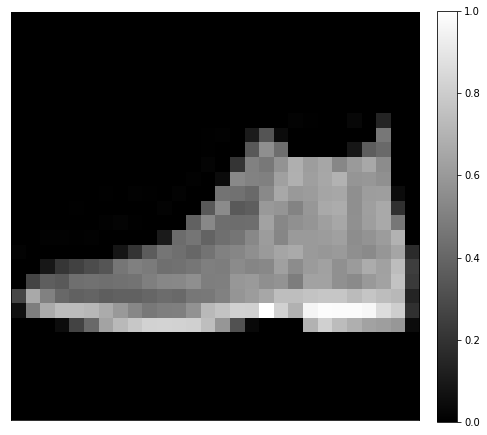

In [ ]:
plt.figure(figsize = (8,8))
im = plt.imshow(test_images[0], cmap='gray')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

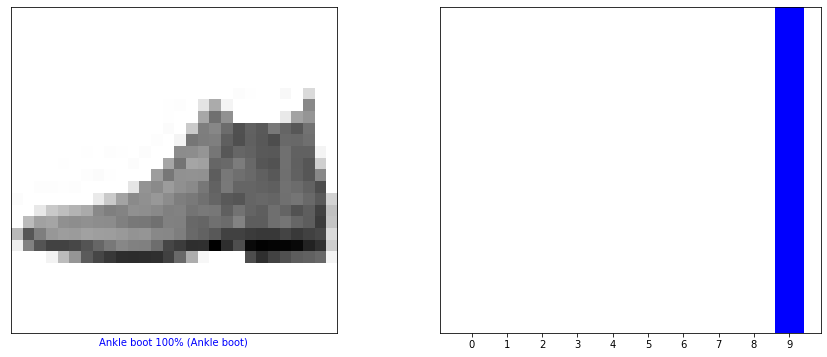

In [ ]:
i = 0
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

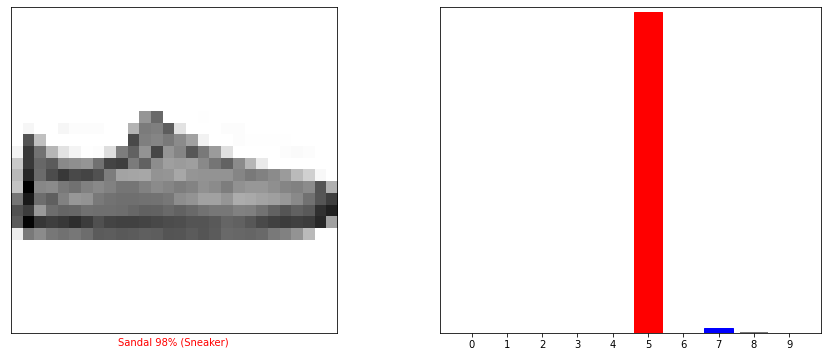

In [ ]:
i = 12
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

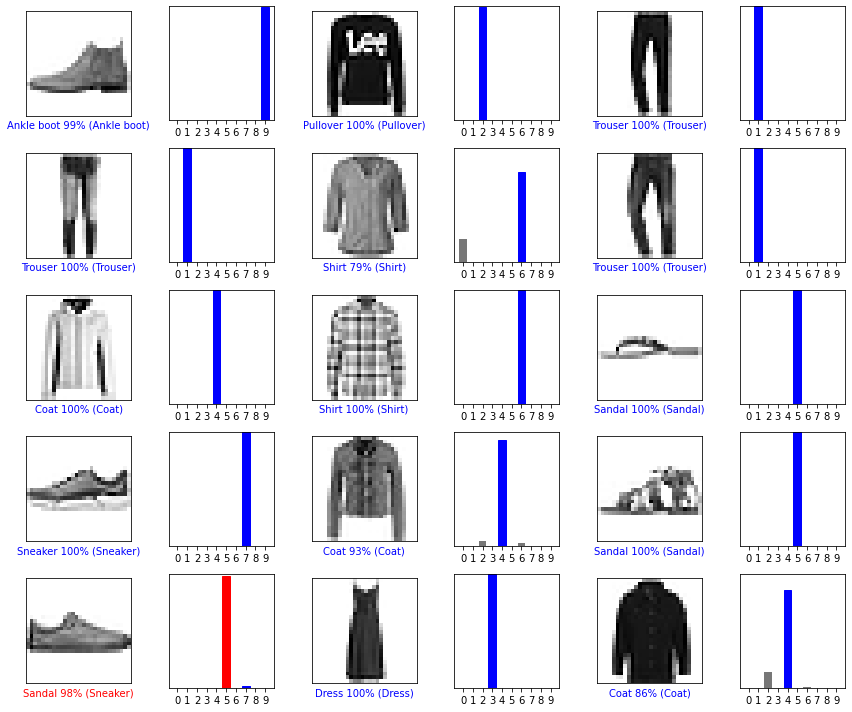

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# II. Post-processing

## II.1 Weight interpretation

Retrieve layer objects

In [ ]:
model.layers

Get the weights of the (first and only) hidden layer

In [ ]:
model.layers[1].get_weights()

[array([[-0.0636832 ,  0.04181662,  0.35234776, ...,  0.31253335,
         -0.5816306 ,  0.09217488],
        [ 0.13836825, -0.15318587,  0.6046291 , ...,  0.415235  ,
          0.5222162 ,  0.3900744 ],
        [-0.3607005 , -0.08673576,  0.380343  , ...,  0.08778084,
          0.4574027 ,  0.17392853],
        ...,
        [-0.11211221,  0.17899622,  0.21984886, ...,  0.00617118,
          0.44111255, -0.1114402 ],
        [-0.3256278 , -0.0996366 ,  0.0340358 , ...,  0.19892956,
         -0.22494768, -0.4335667 ],
        [-0.01830035, -0.25461861,  0.20246972, ...,  0.16435927,
          0.17784731,  0.01476192]], dtype=float32),
 array([ 0.5149692 ,  0.46144977,  0.6904947 ,  0.39058873, -0.01235708,
         0.3629406 ,  0.6015386 ,  0.5869244 , -0.31955898,  0.27101216,
        -0.14667691, -0.01405055,  0.02572335,  0.18506034, -0.18440214,
         0.3511417 , -0.01051149, -0.02827402, -0.19248353,  0.35736012,
        -0.24393477,  0.67300534, -0.00996272, -0.49420464,  0.019

Let's inspect the contents of the list `model.layers[1].get_weights()`

In [ ]:
len(model.layers[1].get_weights()[0].shape)

2

The first array in the list corresponds to the weight coefficients, with shape (`nn_flatten_layer`, `nn_dense_layer`):

In [ ]:
model.layers[1].get_weights()[0].shape

(784, 144)

The second array in the list corresponds to the bias coefficients, with shape (`nn_dense_layer`,):

In [ ]:
model.layers[1].get_weights()[1].shape

(144,)

In [ ]:
W_layer1 = model.layers[1].get_weights()
len(W_layer1[0])

784

Retrieve the weights associated to the first neuron in the hidden layer

In [ ]:
W_unit1_layer1 = [w[0] for w in W_layer1[0]]

Transform the list encapsulating these weights into a (28,28) array

In [ ]:
W_unit1_layer1 = np.array(W_unit1_layer1)
W_unit1_layer1 = np.reshape(W_unit1_layer1, (28,28))

In [ ]:
W_unit1_layer1.shape

(28, 28)

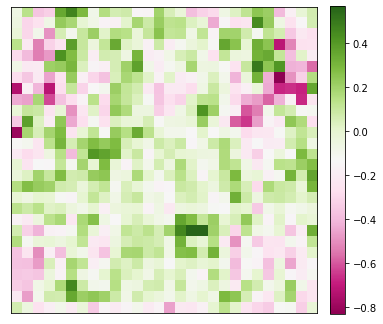

In [ ]:
plt.figure(figsize = (6,6))
im = plt.imshow(W_unit1_layer1, cmap=plt.get_cmap('PiYG'))
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

Repeat the process above for all neurons of the hidden layer

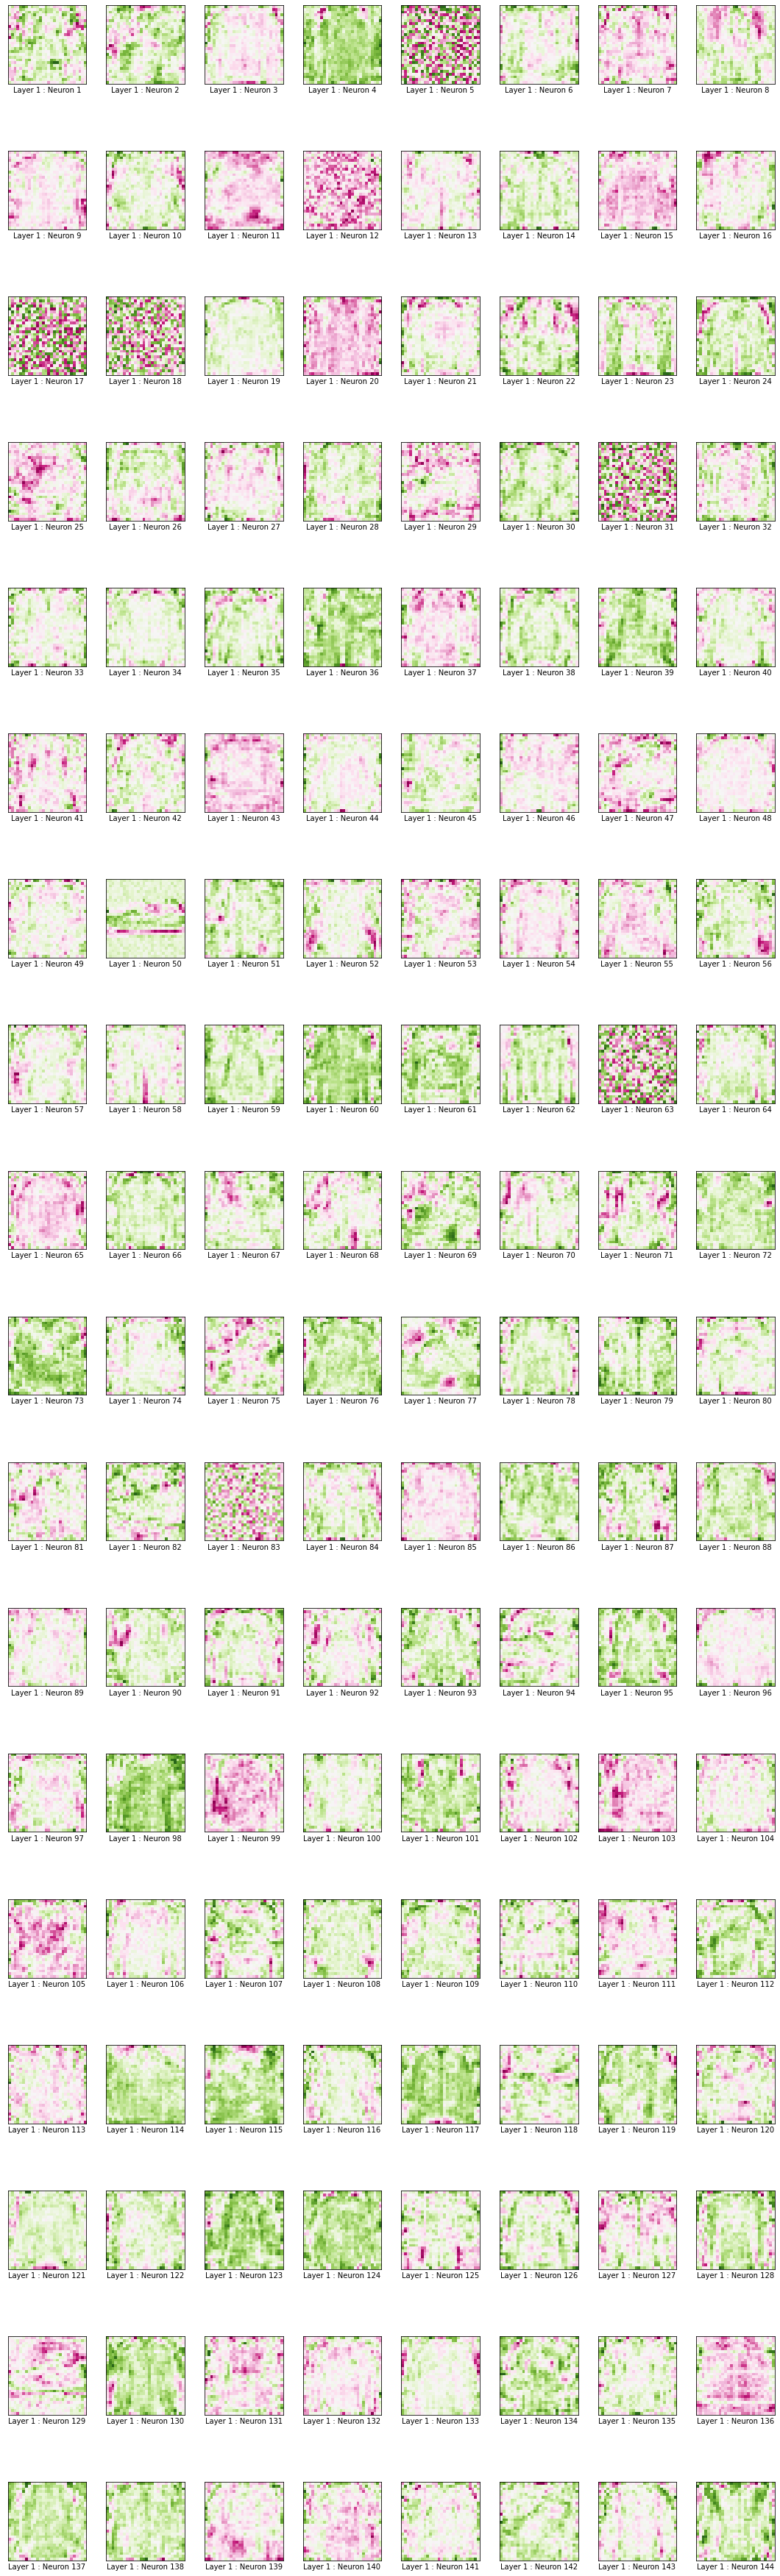

In [ ]:
plt.figure(figsize=(15, 50))

for j in range(nn_dense):
    plt.subplot(18, 8, j+1)
    W_unitj_layer1 = [w[j] for w in W_layer1[0]]
    W_unitj_layer1 = np.array(W_unitj_layer1)
    W_unitj_layer1 = np.reshape(W_unitj_layer1, (28,28))
    plt.imshow(W_unitj_layer1, cmap=plt.get_cmap('PiYG'))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Layer 1 : Neuron {}".format(j+1))

plt.tight_layout()
plt.show()

Let us retrieve the weights of some neurons that seem to have learnt something intuitive for a human observer:


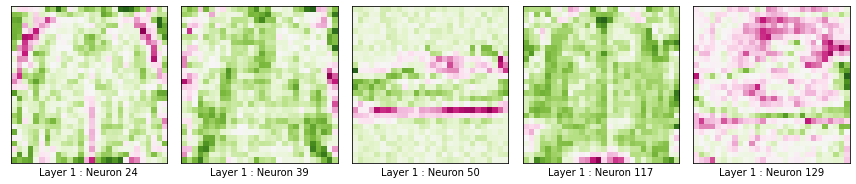

In [ ]:
plt.figure(figsize=(12, 4))

intuitive_nn = [23, 38, 49, 116, 128]

for i,j in enumerate(intuitive_nn):
    plt.subplot(1, 5, i+1)
    W_unitj_layer1 = [w[j] for w in W_layer1[0]]
    W_unitj_layer1 = np.array(W_unitj_layer1)
    W_unitj_layer1 = np.reshape(W_unitj_layer1, (28,28))
    plt.imshow(W_unitj_layer1, cmap=plt.get_cmap('PiYG'))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Layer 1 : Neuron {}".format(j+1))

plt.tight_layout()
plt.show()

Interestingly, neuron **129** seems to have learnt two classes simultaneously (possibly sneaker and shirt).

Let us repeat the process for the weights associated to the output layer:

In [ ]:
W_layer2 = model.layers[2].get_weights()
len(W_layer2[0])

144

In [ ]:
W_layer1[0].shape

(784, 144)

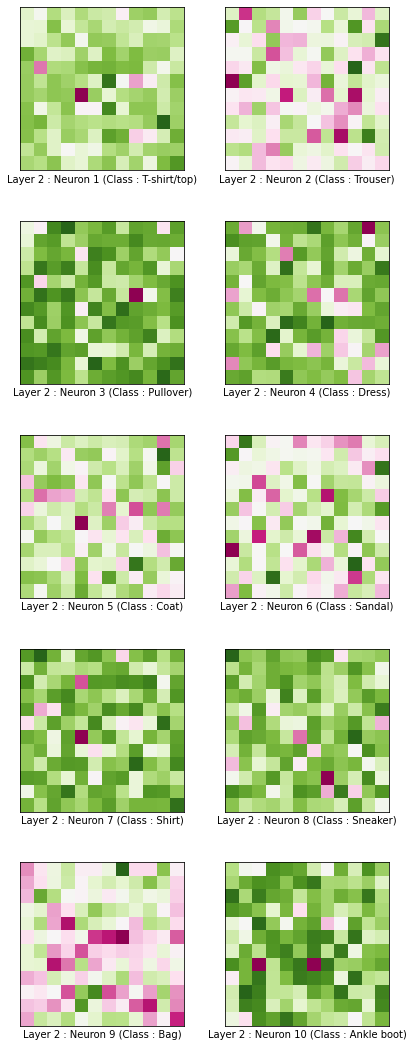

In [ ]:
plt.figure(figsize=(6, 15))

for j in range(10):
    plt.subplot(5, 2, j+1)
    W_unitj_layer2 = [w[j] for w in W_layer2[0]]
    W_unitj_layer2 = np.array(W_unitj_layer2)
    W_unitj_layer2 = np.reshape(W_unitj_layer2, (12,12))
    plt.imshow(W_unitj_layer2, cmap=plt.get_cmap('PiYG'))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Layer 2 : Neuron {} (Class : {})".format(j+1, class_names[j]))

plt.tight_layout()
plt.show()

There is no intuitive interpretation for the weights attached to the output layer.

How is a blank input processed, and what class is ultimately predicted?

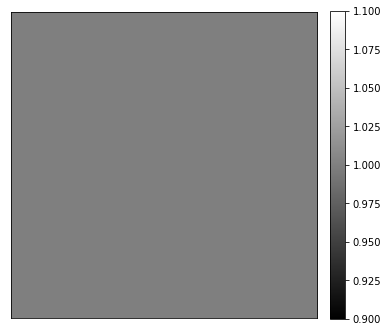

In [ ]:
plt.figure(figsize = (6,6))
im = plt.imshow(np.ones((28,28)), cmap='gray')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
blank = (np.expand_dims(np.ones((28,28)),0))

In [ ]:
predictions_blank = model.predict(blank)

print(predictions_blank)

[[3.2376452e-08 6.9300246e-15 2.1215162e-10 1.6783449e-20 2.2870040e-17
  3.2035909e-22 7.5489304e-08 5.9056497e-37 9.9999988e-01 1.1018450e-20]]


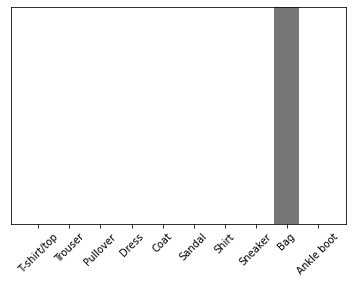

In [ ]:
plt.grid(False)
plt.xticks(range(10))
plt.yticks([])
thisplot = plt.bar(range(10), predictions_blank[0], color="#777777")
plt.ylim([0, 1])

_ = plt.xticks(range(10), class_names, rotation=45)

Reconstruct the path leading to prediction `Bag`:

In [ ]:
model.layers[1].get_weights()[0].shape

(784, 144)

In [ ]:
model.layers[1].get_weights()[0].transpose().shape

(144, 784)

In [ ]:
blank[0,:,:].flatten().shape

(784,)

In [ ]:
model.layers[1].get_weights()[1].shape

(144,)

Calculate feature values in the hidden layer as `weight` * `input` + `bias`:

In [ ]:
z1_blank = model.layers[1].get_weights()[0].transpose().dot(blank[0,:,:].flatten()) + model.layers[1].get_weights()[1]

Apply `relu` activation function:

In [ ]:
a1_blank = np.array([z if z > 0 else 0 for z in z1_blank])

Display the values in the hidden layer as a 12x12 array, to check if there is a pattern:

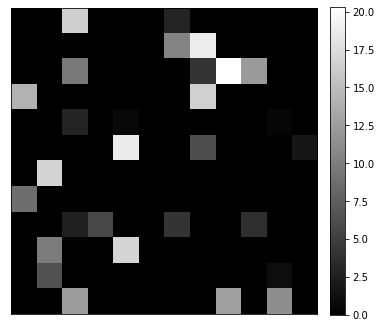

In [ ]:
plt.figure(figsize = (6,6))
im = plt.imshow(np.reshape(a1_blank, (12,12)), cmap='gray')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

There is no intuitive pattern. Which neuron attains the largest value after activation?

In [ ]:
np.argmax(a1_blank)

32

Compare with the weight distribution for `Layer 1 : Neuron 33` above.

Calculate raw output values as `weight` * `a1_blank` + `bias`:

In [ ]:
z2_blank = model.layers[2].get_weights()[0].transpose().dot(a1_blank) + model.layers[2].get_weights()[1]

In [ ]:
z2_blank

array([  0.72393149, -14.63314723,  -4.30395157, -27.56413028,
       -20.34693758, -31.52283045,   1.5704908 , -65.44997315,
        17.96976258, -27.98495187])

Apply `softmax` manually:

In [ ]:
np.exp(z2_blank)

array([2.06252610e+00, 4.41473768e-07, 1.35150477e-02, 1.06917876e-12,
       1.45692530e-09, 2.04083870e-14, 4.80900787e+00, 3.76216483e-29,
       6.37042973e+07, 7.01923569e-13])

In [ ]:
sumexp = sum(np.exp(z2_blank))

In [ ]:
np.exp(z2_blank)/sumexp

array([3.23765580e-08, 6.93004615e-15, 2.12152819e-10, 1.67834618e-20,
       2.28701234e-17, 3.20361195e-22, 7.54895282e-08, 5.90566820e-37,
       9.99999892e-01, 1.10184638e-20])

Compare with predictions obtained previously:

In [ ]:
predictions_blank

array([[3.2376452e-08, 6.9300246e-15, 2.1215162e-10, 1.6783449e-20,
        2.2870040e-17, 3.2035909e-22, 7.5489304e-08, 5.9056497e-37,
        9.9999988e-01, 1.1018450e-20]], dtype=float32)

Subset weights associated with the output neuron for class `Bag`:

In [ ]:
bag_weights = [w[8] for w in W_layer2[0]]

In [ ]:
max(bag_weights)

0.87177396

In [ ]:
bag_weights.index(max(bag_weights))

7

In [ ]:
sorted(range(len(bag_weights)), key=lambda x: bag_weights[x], reverse=True)[:10]

[7, 113, 124, 25, 21, 10, 41, 112, 118, 52]

In [ ]:
a1_blank[sorted(range(len(bag_weights)), key=lambda x: bag_weights[x], reverse=True)[:10]]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , 16.96856521,  0.        ,  0.67260549])

In [ ]:
bag_weights * a1_blank 

array([-0.        , -0.        ,  0.58825732,  0.        , -0.        ,
       -0.        ,  0.12748299,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  2.01837779,  2.17264216,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  3.01247707, -0.        , -0.        ,  0.        ,
       -0.        , -0.08667494,  2.97163689,  0.06775895,  0.        ,
       -0.        ,  0.37614974,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  3.17398583,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -1.47105664, -0.        ,  0.22768321,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.1331936 , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.09095334,
       -0.        , -0.        , -6.24280928, -0.        , -0.  

Only 30 (out of 144) neurons from the hidden layer contribute to produce an output when the MLP is fed a blank: 

In [ ]:
sum([x*x>0 for x in a1_blank])

30

## II.2 Evolution of weights over training epochs

In [ ]:
def create_compile_MLP(seed,
                       n_hidden_layers=1,
                       nn_out=10,
                       nn=(784,),
                       input_shape=(28,28),
                       g=('relu',), g_out='softmax'):

    seq_list = [keras.layers.Flatten(input_shape=input_shape)]
    for hl in range(n_hidden_layers):
        seq_list.append(keras.layers.Dense(nn[hl],
                                           activation=g[hl],
                                           kernel_initializer=GlorotUniform(seed=seed)))
    seq_list.append(keras.layers.Dense(nn_out,
                                       activation=g_out,
                                       kernel_initializer=GlorotUniform(seed=seed)))
    
    model = keras.Sequential(seq_list)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
def track_epochs(n_epochs, seed,
                 train_images, train_labels,
                 test_images, test_labels,
                 layerID=1, unitID=0,
                 n_hidden_layers=1,
                 nn_out=10):

    plt.figure(figsize=(5, 6*n_epochs))
    # neuron_evol = []
    for e in range(1, n_epochs+1):

        model = create_compile_MLP(seed=seed,
                                   n_hidden_layers=n_hidden_layers,
                                   nn_out=nn_out)
        h = model.fit(train_images,
                      train_labels,
                      epochs=e,
                      validation_data=(test_images, test_labels),
                      verbose=0)
    
        W_layerL = model.layers[layerID].get_weights()
        W_unitU_layerL = [w[unitID] for w in W_layerL[0]]
        W_unitU_layerL = np.array(W_unitU_layerL)
        W_unitU_layerL = np.reshape(W_unitU_layerL, (28,28))

        # neuron_evol.append(W_unitU_layerL)

        plt.subplot(n_epochs, 1, e)
        
        plt.imshow(W_unitU_layerL, cmap=plt.get_cmap('PiYG'))
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel("Layer {} : Neuron {} (epoch {})".format(layerID, unitID+1, e))

    plt.show()

Focus for instance on the weight distribution for neuron 1 in the hidden layer:

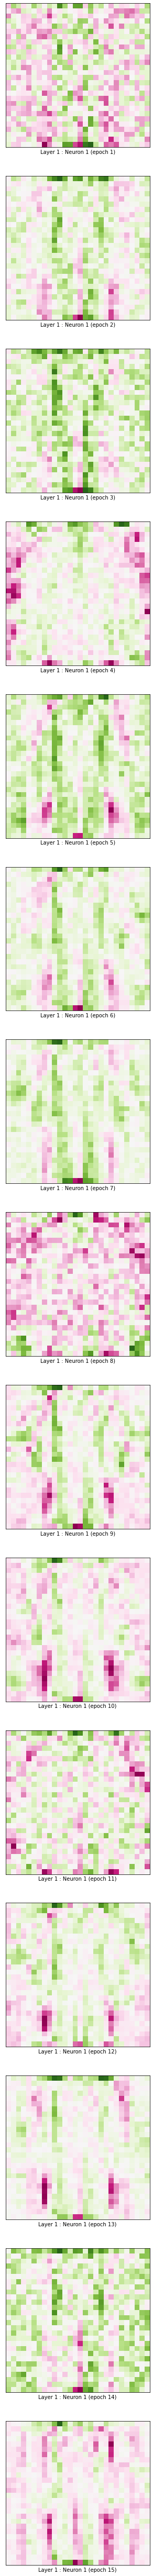

In [ ]:
track_epochs(n_epochs, RANDOM_SEED,
             train_images, train_labels,
             test_images, test_labels)

Interestingly, the weight distribution adopts an intuitive shape and then becomes abstract again. This could be interpreted as another sign of overfitting.